In [1]:
from imutils import paths

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import time
import pandas as pd
from datetime import datetime

In [3]:
import cv2 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/utils/validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'


In [4]:
import os 
from skillsnetwork import cvstudio

In [5]:
client = cvstudio.CVStudio()

In [6]:
client.downloadAll()

100%|██████████| 200/200 [00:57<00:00,  3.46it/s]


In [6]:
annotations = client.get_annotations()

In [7]:
first5 = {k: annotations["annotations"][k] for k in list(annotations['annotations'])[:5]}
first5

{'e5a9b239-ff15-47be-a555-d956ca4ca539.jpg': [{'label': 'cat'}],
 'f16d96ca-b968-4dd1-b149-989b531fa2cd.jpg': [{'label': 'dog'}],
 'c6ff3789-5d5c-431f-9d9e-dfceaf3e553e.jpg': [{'label': 'dog'}],
 'f36375c3-d84e-49cd-90a6-9296c35fbb81.jpg': [{'label': 'dog'}],
 '8f1fab81-8dce-4b93-bbde-e88e70a270f1.jpg': [{'label': 'cat'}]}

In [8]:
filename = 'images/' + random.choice(list(annotations['annotations'].keys()))

In [9]:
filename

'images/38707844-6051-4ddd-bb28-0c813d003827.jpg'

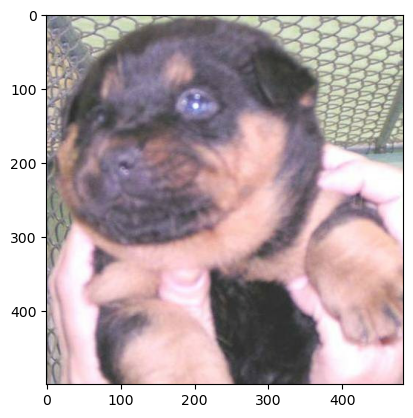

In [10]:
img = cv2.cvtColor(cv2.imread(filename), cv2.COLOR_BGR2RGB)
plt.imshow(img)

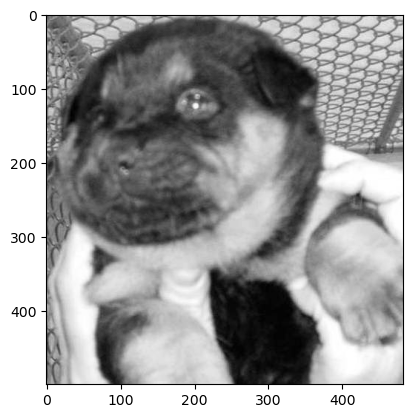

In [11]:
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(img, cmap = 'gray')

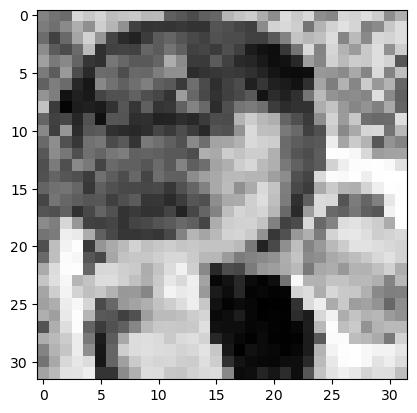

In [12]:
img = cv2.resize(img, (32,32))
plt.imshow(img, cmap = 'gray')

In [13]:
pixels = img.flatten()
print(img, "\n\n\n\n", pixels)

[[155 141 135 ... 214 163 190]
 [149 139 160 ... 160 209 227]
 [136 101 134 ... 222 220 227]
 ...
 [155 194 208 ... 244 244 234]
 [141 184 223 ... 233 240 226]
 [180 199 231 ... 228 227 202]] 



 [155 141 135 ... 228 227 202]


In [14]:
type(pixels)

numpy.ndarray

In [15]:
imgclass = list(annotations['annotations'].values())

In [16]:
imgclass[0]

[{'label': 'cat'}]

In [17]:
list(imgclass[0][0].values())[0]

'cat'

In [18]:
imgname = list(annotations['annotations'].keys())

In [19]:
imgname[0]

'e5a9b239-ff15-47be-a555-d956ca4ca539.jpg'

In [20]:
trainimg = []
trainlabel = []

In [21]:
for i, filename in enumerate(imgname):
    img = cv2.imread("images/" + filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    label = list(imgclass[i][0].values())[0]
    img = cv2.resize(img, (32,32))
    pixels = img.flatten()
    trainimg.append(pixels)
    trainlabel.append(label)
    print("Loading item", str(i+1), "of", str(len(imgname)), "... Image is a", label)

Loading item 1 of 200 ... Image is a cat
Loading item 2 of 200 ... Image is a dog
Loading item 3 of 200 ... Image is a dog
Loading item 4 of 200 ... Image is a dog
Loading item 5 of 200 ... Image is a cat
Loading item 6 of 200 ... Image is a dog
Loading item 7 of 200 ... Image is a cat
Loading item 8 of 200 ... Image is a cat
Loading item 9 of 200 ... Image is a cat
Loading item 10 of 200 ... Image is a cat
Loading item 11 of 200 ... Image is a cat
Loading item 12 of 200 ... Image is a cat
Loading item 13 of 200 ... Image is a cat
Loading item 14 of 200 ... Image is a dog
Loading item 15 of 200 ... Image is a dog
Loading item 16 of 200 ... Image is a cat
Loading item 17 of 200 ... Image is a cat
Loading item 18 of 200 ... Image is a cat
Loading item 19 of 200 ... Image is a dog
Loading item 20 of 200 ... Image is a dog
Loading item 21 of 200 ... Image is a cat
Loading item 22 of 200 ... Image is a dog
Loading item 23 of 200 ... Image is a dog
Loading item 24 of 200 ... Image is a cat
L

In [22]:
trainimg = np.array(trainimg).astype('float32')
trainimg

array([[ 29.,  31.,  32., ...,  77.,  52.,  42.],
       [252., 252., 252., ...,  87.,  85.,  88.],
       [197., 189., 206., ..., 255., 255., 251.],
       ...,
       [ 49.,  60.,  68., ..., 106., 102., 156.],
       [110., 115., 160., ..., 117., 141., 100.],
       [ 16.,  24.,  25., ...,  57.,  62.,  56.]], dtype=float32)

In [23]:
len(trainimg[0])

1024

In [24]:
classes = np.unique(trainlabel)
classes

array(['cat', 'dog'], dtype='<U3')

In [25]:
for i, label in enumerate(classes):
    for j, imgclass in enumerate(trainlabel):
        if imgclass == label:
            trainlabel[j] = i

In [26]:
trainlabel = np.array(trainlabel).astype('int32')

In [27]:
trainlabel.size

200

In [28]:
trainlabel = trainlabel.reshape(trainlabel.size, 1)

In [29]:
trainlabel.shape

(200, 1)

In [30]:
trainlabel.dtype

dtype('int32')

In [31]:
trainimg, testimg, trainlabel, testlabel = train_test_split(trainimg, trainlabel, test_size=0.2, random_state= 0)

In [32]:
print(trainimg.shape, testimg.shape, trainlabel.shape, testlabel.shape)

(160, 1024) (40, 1024) (160, 1) (40, 1)


In [33]:
starttime = datetime.now()

knn = cv2.ml.KNearest_create()
knn.train(trainimg, cv2.ml.ROW_SAMPLE, trainlabel)

k_val = [1,2,3,4,5]
k_res = [[],[],[],[],[]]

for i, k in enumerate(k_val):
    ret, result, neighbours, dist = knn.findNearest(testimg, k=k)
    for sublist in result:
        for item in sublist:
            k_res[i].append(item)

endtime = datetime.now()
print("Training duration:", str(endtime - starttime))

Training duration: 0:00:00.136406


In [34]:
type(k_res)

list

In [35]:
pred = np.asanyarray(k_res)

In [36]:
pred[0]

array([1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 0., 1.], dtype=float32)

In [37]:
testlabel.shape

(40, 1)

In [38]:
accuracy = []
conmtx = []

for res in pred:
    cmx = confusion_matrix(testlabel, res, labels = np.unique(testlabel))
    conmtx.append(cmx)
    correct = 0
    for i, j in zip(res,testlabel):
        if i == j:
            correct += 1
    a = correct * 100 / res.size
    accuracy.append(a)

In [39]:
conmtx, accuracy

([array([[15,  4],
         [12,  9]]),
  array([[17,  2],
         [16,  5]]),
  array([[13,  6],
         [11, 10]]),
  array([[14,  5],
         [14,  7]]),
  array([[ 9, 10],
         [ 7, 14]])],
 [60.0, 55.0, 57.5, 52.5, 57.5])

In [40]:
resultaccuracy = {k_val[i]: accuracy[i] for i in range(len(k_val))}
finalaccuracy = sorted(resultaccuracy.items())

In [41]:
finalaccuracy

[(1, 60.0), (2, 55.0), (3, 57.5), (4, 52.5), (5, 57.5)]

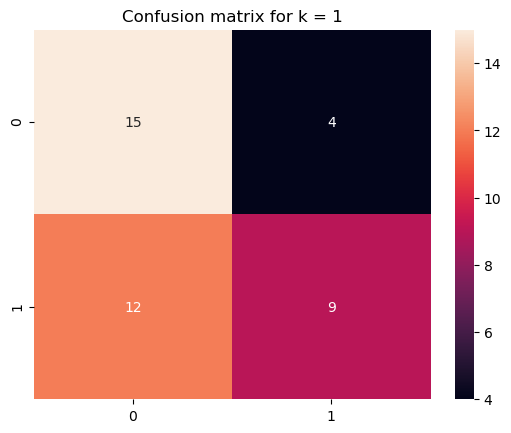

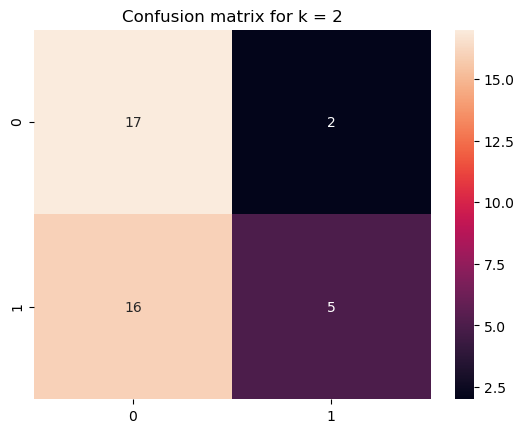

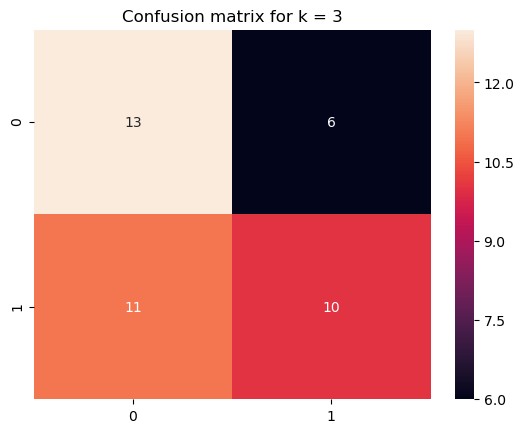

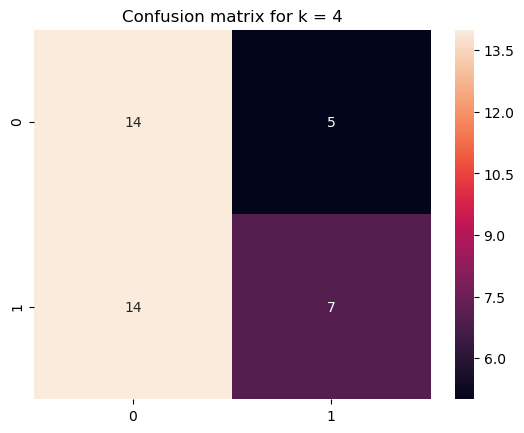

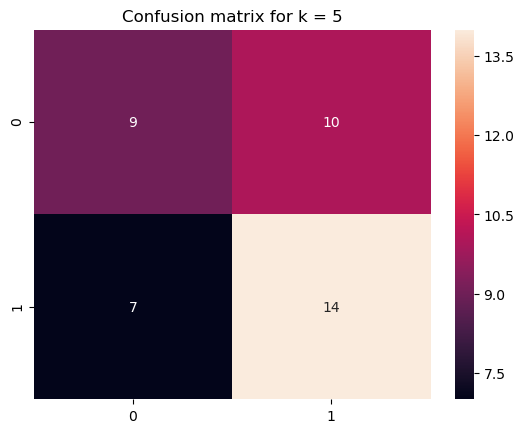

In [42]:
t = 1
for mtx in conmtx:
    df = pd.DataFrame(mtx)
    sns.heatmap(df, annot=True)
    plt.title("Confusion matrix for k = " + str(t))
    plt.show()
    t += 1

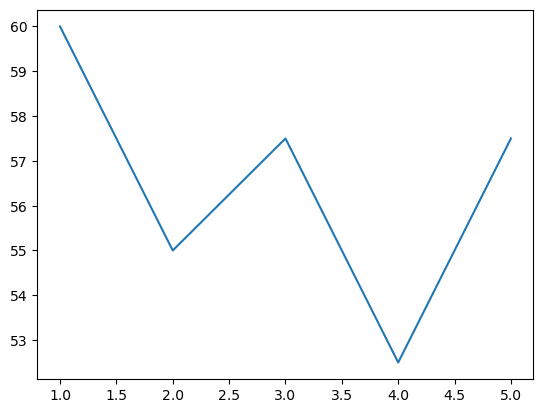

In [43]:
x,y = zip(*finalaccuracy)
plt.plot(x,y)

In [44]:
k_best = max(finalaccuracy,key=lambda item:item[1])
k_best

(1, 60.0)

In [45]:
parameters = {'k_best': k_best}
result = client.report(started=starttime, completed=endtime, parameters = parameters, accuracy=finalaccuracy)

if result.ok:
    print("Reported back to CV Studio")

Reported back to CV Studio


In [46]:
knn.save('knn_model.yml')

In [47]:
result = client.uploadModel('knn_model.yml', parameters)

File Uploaded
